# Exercises 10 - 11/12/2023

In [3]:
import scipy.stats as sc
import numpy as np 
from mylib.radom_numbers import rand_expon
import matplotlib.pyplot as plt
from mylib.matstyle import hist_style

## Exercise 10.1

Write a library of functions to determine the parameter τ of an exponential distribution from a list of numbers filled with pseudo-random numbers distributed according to an exponential probability density distribution.

Compare the result obtained with the mean of the numbers saved in the list.

How does the result depend on the initial interval passed to the sezione_aurea_max_LL function?

In [4]:
from mylib.function_study import maximum
from mylib.parameters_estimator import loglikelyhood, exponential_pdf

true_t0 = 5
data = rand_expon(true_t0,size=10000) # genero dati distr esponenziale (10000)

a,b = 1,10 # intervallo in cui cerco il valore true_t0

t0_hat = maximum(lambda x: loglikelyhood(exponential_pdf,data,x),a,a + 0.382*(b-a),a + 0.618*(b-a),b) # cerca il massimo della funzione h(x)

print('t0 hat (tau): ',t0_hat)
print('mean t0 (tau): ',np.mean(data))

# plt.plot(t0s,eval_h)
# plt.ylim(-1,1)
# plt.show()

t0 hat (tau):  4.922998792109563
mean t0 (tau):  4.922990820362391


The interval passed to *sezione_aurea_max_LL* does not effect the value of $\tau$.
If the maximum of the function is not in the interval max=a or b

## Exercise 10.2
Plot the profile of the likelihood function and the point identified as its maximum.

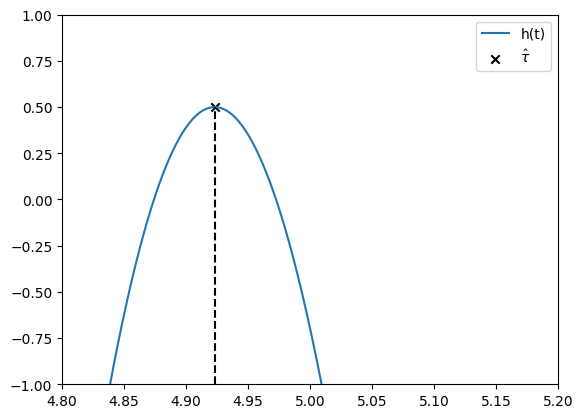

In [5]:
X = np.linspace(4.8,5.2,1000)
h = lambda x: loglikelyhood(exponential_pdf,data,x) - loglikelyhood(exponential_pdf,data,t0_hat) + 0.5
plt.plot(X,[h(x) for x in X],label='h(t)')
plt.scatter(t0_hat,h(t0_hat),marker='x',color='black',label='$\hat{\\tau}$')
plt.plot(np.ones(100)*t0_hat,np.linspace(-1,h(t0_hat),100),linestyle='--',color='black')
plt.xlim(4.8,5.2)
plt.ylim(-1,1)
plt.legend()
plt.show()

## Exercises 10.3
Modify the sezione_aurea_max_LL function, adding the printing of the interval endpoint values at each iteration, to observe the narrowing of the interval during program execution.

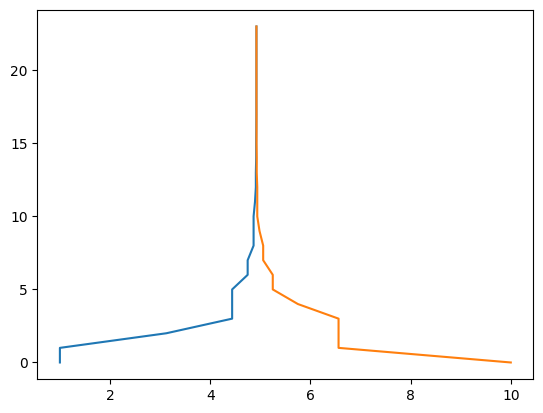

In [6]:
A = []
B = []
def maximum(f,a,x1,x2,b,prec = 0.0001):
    global A
    global B
    A.append(a)
    B.append(b)
    if np.abs(b - a) < prec: return x2
    if f(x1) > f(x2): return maximum(f,a,a+(1-0.618)*(x2-a),x1,x2,prec)
    else: return maximum(f,x1,x2,x1+0.618*(b-x1),b,prec)

maximum(h,a,a + 0.382*(b-a),a + 0.618*(b-a),b)

Y = np.arange(0,len(A))
plt.plot(A,Y)
plt.plot(B,Y)
plt.show()

## Exercise 10.4
Modify the loglikelihood function to calculate the logarithm of the product of the values of the probability density function, rather than the sum of individual logarithms. How does the algorithm’s behavior change

the product of more than a few hundreds $f(x_i,\theta)$ gives a number smaller than the precision of np.float128

## Exercise 10.5
Graphically show that as the available sample size increases, the profile of the logarithm of the likelihood function becomes narrower.

To simplify visualization, use the logarithm of the ratio between the likelihood function and its maximum value:

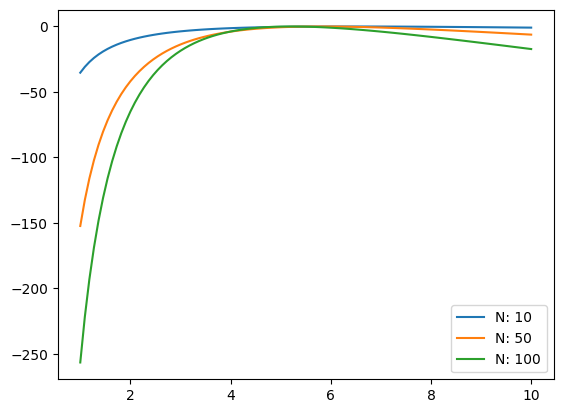

In [7]:
from mylib.parameters_estimator import likelyhood
true_t0 = 5
a,b = 1,10
t0s = np.linspace(a,b,100)

for N in [10,50,100]:
    data = rand_expon(true_t0,size=N)
    L = np.array([likelyhood(exponential_pdf,data,t) for t in t0s])
    # eval_h = L - np.max(L) + 0.5 # h(x)
    m = np.max(L)
    # L = L - m + 0.5
    l = np.log(L/m)
    plt.plot(t0s,np.log(L/m),label=f'N: {N}')

plt.legend()
# plt.xlim(4,6)
# plt.ylim(-1,1)
plt.show()

## Exercise 10.6
Use the bisection method to find the two points τ - στ and τ + στ related to Exercise 1.

Plot the log-likelihood profile, the estimator values, and the confidence interval along with the horizontal segment used for its determination.

In [8]:
from mylib.function_study import zero

def bisection_for_likelihood(h,a,xmax,b,prec: float=0.0001):
    return zero(h,a,xmax,prec),zero(h,xmax,b,prec)

t0 hat (tau):  5.104981574751397
mean t0 (tau):  5.104958777264829
sigma:  0.014145489407536868


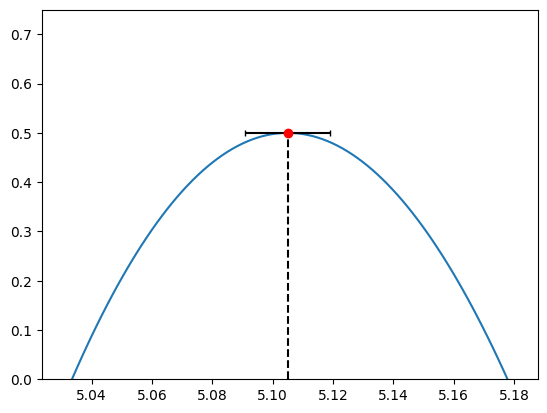

In [9]:
from mylib.function_study import maximum
from mylib.parameters_estimator import loglikelyhood, exponential_pdf

true_t0 = 5
data = rand_expon(true_t0,size=5000)

a,b = 1,10

t0_hat = maximum(h,a,a + 0.382*(b-a),a + 0.618*(b-a),b)
h = lambda x: loglikelyhood(exponential_pdf,data,x) - loglikelyhood(exponential_pdf,data,t0_hat) + 0.5
ta,tb = bisection_for_likelihood(h,a,t0_hat,b)
sigma = (tb-ta)/(2*t0_hat)

print('t0 hat (tau): ',t0_hat)
print('mean t0 (tau): ',np.mean(data))
print('sigma: ',sigma)

lima,limb = ta - 0.01,tb +0.01
x = np.linspace(lima,limb,100)
#plt.plot(x,[h(i) for i in x])
plt.plot(x,[h(t) for t in x])
plt.ylim(0,0.75)
plt.errorbar(t0_hat,0.5,marker='o',color='red',xerr=sigma,capsize=2,ecolor='black')
plt.plot(np.ones(100)*np.mean(data),np.linspace(0,0.5,100),color='black',linestyle='--')
plt.xlim(lima,limb)
plt.show()

## Exercise 10.7
Using the toy experiments technique, plot the probability distribution of the τ estimator.

Overlay the generated histogram with the plot of the estimator and the confidence interval found in the previous exercise.

Compare the value of στ obtained in the previous exercise with the one calculated from the distribution of the numbers saved in the list.

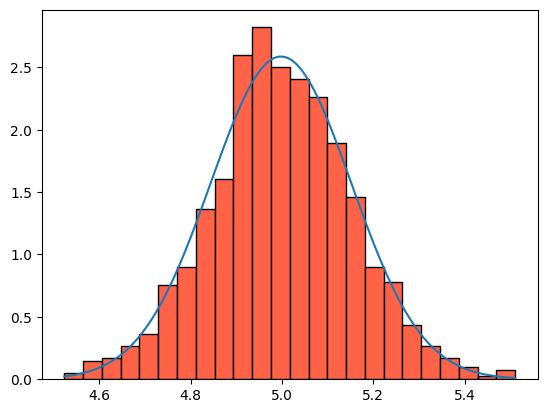

In [10]:
from mylib.basics import sturges
def toy(N):
    true_t0 = 5
    a,b = 1,10
    data = rand_expon(true_t0,size=N)
    return maximum(lambda x: loglikelyhood(exponential_pdf,data,x),a,a + 0.382*(b-a),a + 0.618*(b-a),b)

tau = np.array([toy(1000) for _ in range(1000)])

plt.hist(tau,**hist_style(1000))
x = np.linspace(min(tau),max(tau),100)
plt.plot(x,sc.norm.pdf(x,loc=np.mean(tau),scale=np.std(tau)))
plt.show()

## WHICH DISTRIBUTION FOLLOWS $\hat{\theta}?$